# Stage 4. Sound type classification

In [5]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.append("../src")

import pandas as pd
import pickle 
from tqdm import tqdm

from classification import (
    build_heart_dataframe,
    build_lung_dataframe,
    make_heart_design_matrix,
    make_lung_design_matrix,
    kfold_evaluate,
    plot_scores,
    show_best_cm,
)

from metadata.loading import load_datasets

## Classification models

In [7]:
# datasets = load_datasets()
# heart_df = build_heart_dataframe(datasets["heart_data"], datasets["mix_heart_data"])
# lung_df  = build_lung_dataframe(datasets["lung_data"], datasets["mix_lung_data"])

# heart_design = make_heart_design_matrix(heart_df)
# lung_design  = make_lung_design_matrix(lung_df)

# with open("../data/design_matrices/heart_design.pkl", "wb") as f:
#     pickle.dump(heart_design, f)

# with open("../data/design_matrices/lung_design.pkl", "wb") as f:
#     pickle.dump(lung_design, f)

# Load design_matrix

with open("../data/design_matrices/heart_design.pkl", "rb") as f:
    heart_design = pickle.load(f)

with open("../data/design_matrices/lung_design.pkl", "rb") as f:
    lung_design = pickle.load(f)

print("Heart X shape:", heart_design.X.shape)
print("Lung  X shape:", lung_design.X.shape)

Heart X shape: (195, 31)
Lung  X shape: (195, 31)


In [8]:
models = [
    "logreg",
    "rf",
    "svm_rbf",
    "knn",
    "pca_logreg",
    "gmm",
]

heart_results = []
lung_results = []

for m in tqdm(models, desc="Running Models", ncols=100):
    
    # Heart model
    for _ in tqdm(range(1), desc=f"[{m}] Heart", leave=False, ncols=100):
        H, _, _, _ = kfold_evaluate(
            heart_design.X,
            heart_design.y,
            model_type=m,
            k=5,
            outdir="outputs/classification/heart",
            prefix="heart"
        )
        heart_results.append({"model": m, **H})

    # Lung model
    for _ in tqdm(range(1), desc=f"[{m}] Lung", leave=False, ncols=100):
        L, _, _, _ = kfold_evaluate(
            lung_design.X,
            lung_design.y,
            model_type=m,
            k=5,
            outdir="outputs/classification/lung",
            prefix="lung"
        )
        lung_results.append({"model": m, **L})

Running Models: 100%|█████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.06s/it]


## Model performances

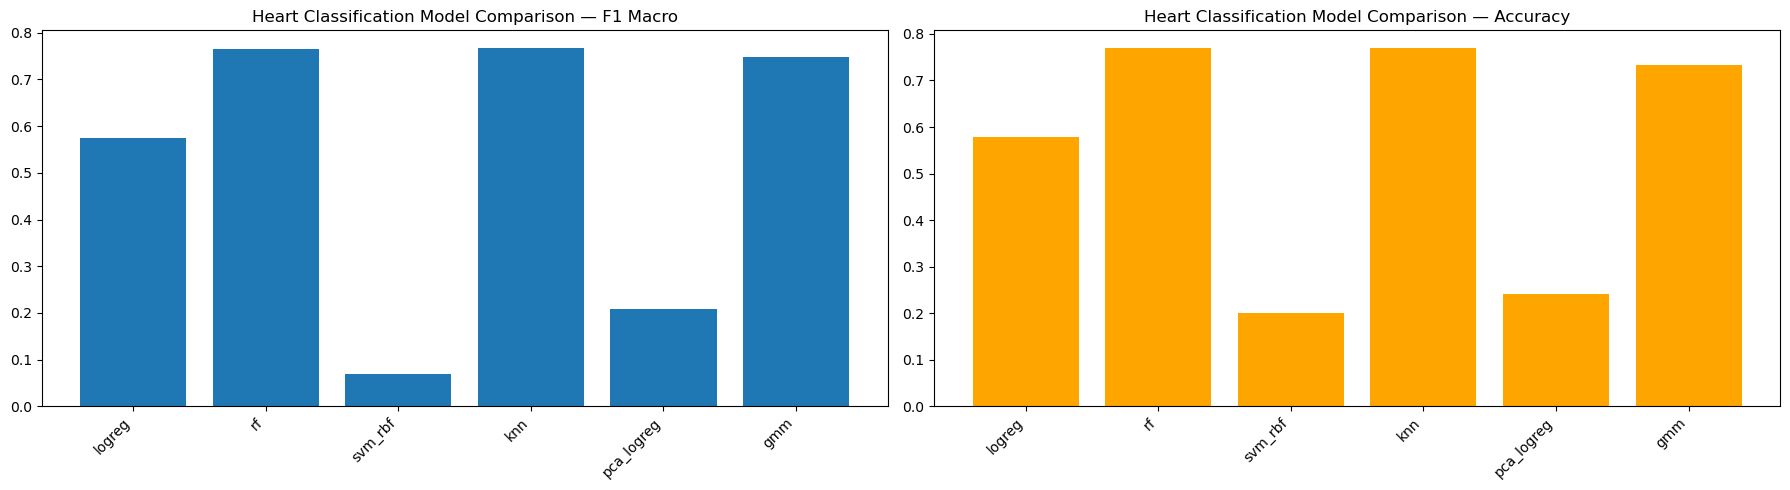

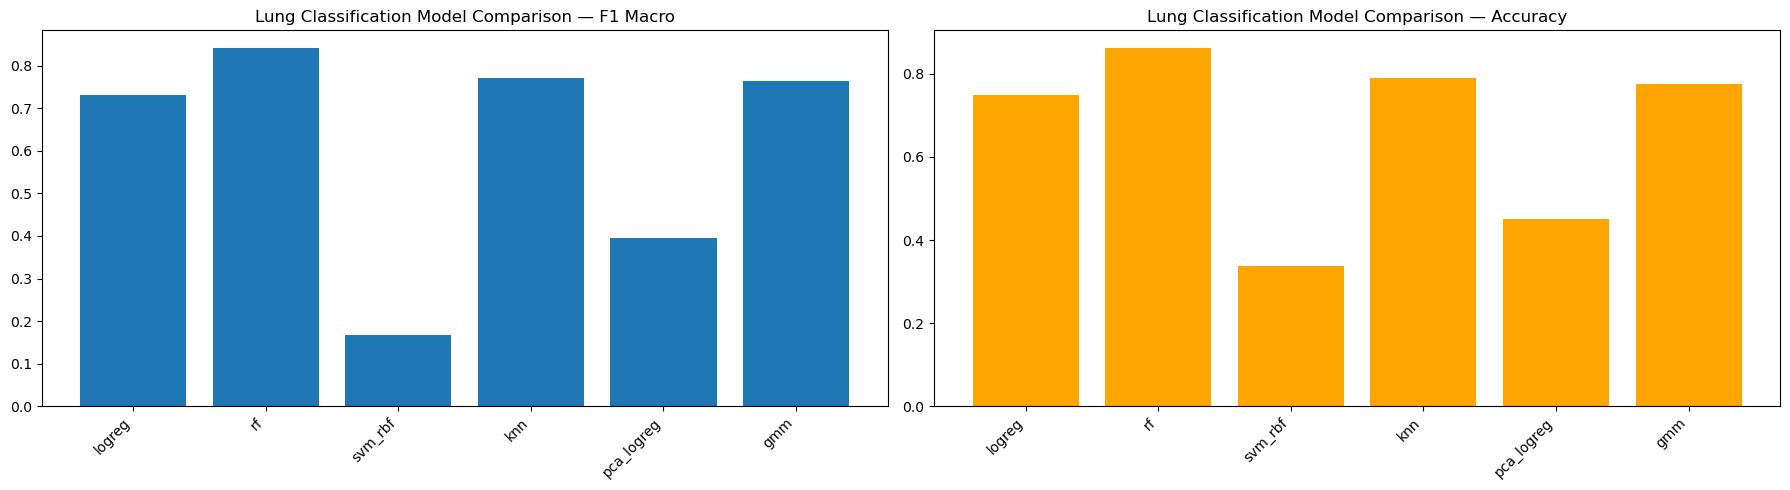

Best HEART model: knn | F1 = 0.7667215007215008 | accuracy = 0.7692307692307692
Best LUNG model: rf | F1 = 0.8407820284290872 | accuracy = 0.8615384615384615


In [9]:
df_h = pd.DataFrame(heart_results)
df_l = pd.DataFrame(lung_results)

plot_scores(df_h, "Heart Classification Model Comparison")
plot_scores(df_l, "Lung Classification Model Comparison")

best_heart_row = df_h.sort_values("f1_macro", ascending=False).iloc[0]
best_lung_row  = df_l.sort_values("f1_macro", ascending=False).iloc[0]

print(
    "Best HEART model:",
    best_heart_row["model"],
    "| F1 =", best_heart_row["f1_macro"],
    "| accuracy =", best_heart_row["accuracy"],
)

print(
    "Best LUNG model:",
    best_lung_row["model"],
    "| F1 =", best_lung_row["f1_macro"],
    "| accuracy =", best_lung_row["accuracy"],
)



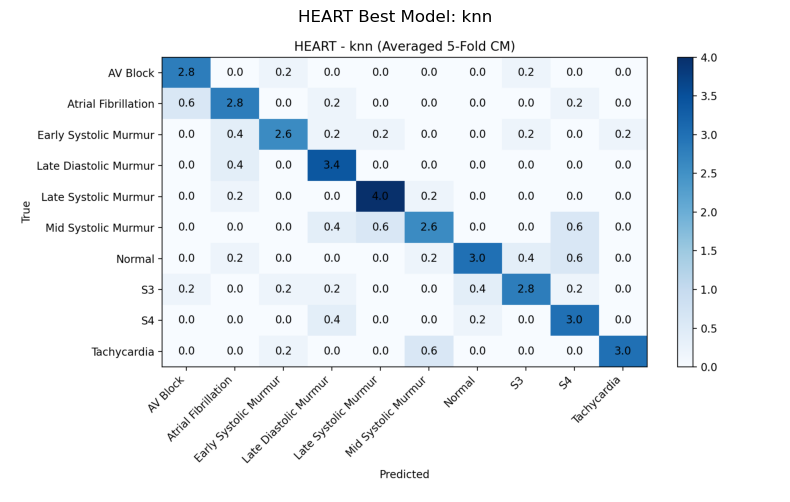

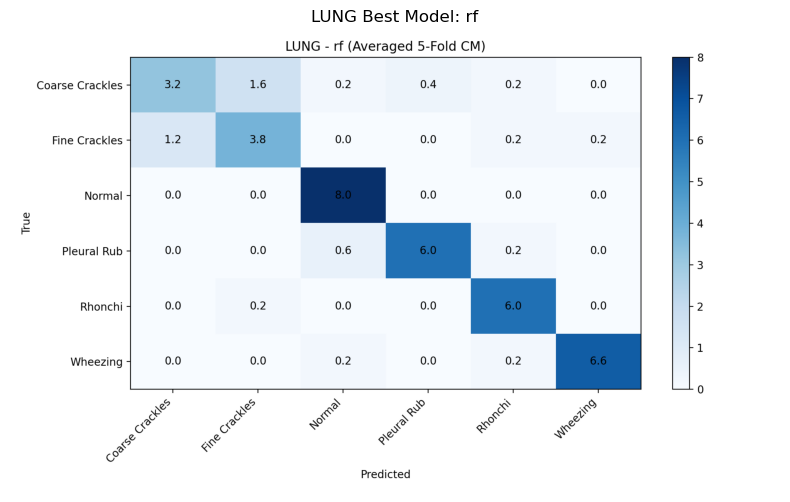

In [10]:
show_best_cm(df_h, "heart")
show_best_cm(df_l, "lung")